In [1]:
# TO TEST
# speed
# compatibility with crypten
# similarity with gpytorch
# final result

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from gptorch.models.gpr import GPR
from gptorch.models.sparse_gpr import VFE, SVGP
from gptorch import kernels
from gptorch.util import TensorType
from gptorch import kernels
from gptorch import mean_functions

np.random.seed(42)
torch.manual_seed(42)

In [3]:
def f(x):
    return np.sin(2. * np.pi * x)
# def f(x):
#     return np.sin(2. * np.pi * x) + np.cos(3.5 * np.pi * x) - 3.0 * x + 5.0

In [4]:
n = 500
x = np.random.rand(n, 1)
y = f(x) + 0.1 * np.random.randn(n, 1)

In [5]:
# Kernel

kern = kernels.Rbf(1)
# kern = kernels.Matern52(1)
# kern = kernels.Linear(1) + ke÷rnels.Rbf(1)

# mean_function = None

# A traditional, simple parametric mean function:
mean_function = mean_functions.Constant(1)
# mean_function = torch.nn.Linear(1, 1)


# Something more exotic
# mean_function = torch.nn.Sequential(
#     torch.nn.Linear(1, 64),
#     torch.nn.ReLU(),
#     torch.nn.Linear(64, 64),
#     torch.nn.ReLU(),
#     torch.nn.Linear(64, 1)
# )

# Try different models:
# model = GPR(x, y, kern, mean_function=mean_function)
# model = VFE(x, y, kern)
model = SVGP(x, y, 
        kern,
        num_inducing_points=500,
#         inducing_points=None,
        mean_function=mean_function,
#         likelihood=Gaussian(),
        batch_size=500
        )

tensor([1.], grad_fn=<SoftplusBackward>)
tensor([1.], grad_fn=<SoftplusBackward>)
tensor([[2.0000, 0.9775, 0.9267,  ..., 0.8080, 0.7035, 0.8590],
        [0.9775, 2.0000, 0.9845,  ..., 0.9080, 0.8225, 0.9445],
        [0.9267, 0.9845, 2.0000,  ..., 0.9661, 0.9043, 0.9871],
        ...,
        [0.8080, 0.9080, 0.9661,  ..., 2.0000, 0.9829, 0.9948],
        [0.7035, 0.8225, 0.9043,  ..., 0.9829, 2.0000, 0.9595],
        [0.8590, 0.9445, 0.9871,  ..., 0.9948, 0.9595, 2.0000]],
       grad_fn=<AddBackward0>)
tensor([1.], grad_fn=<SoftplusBackward>)
tensor([[0.0153, 0.0091, 0.0153,  ..., 0.0070, 0.0160, 0.0137],
        [0.0091, 0.0133, 0.0090,  ..., 0.0136, 0.0079, 0.0109],
        [0.0153, 0.0090, 0.0154,  ..., 0.0069, 0.0161, 0.0137],
        ...,
        [0.0070, 0.0136, 0.0069,  ..., 0.0147, 0.0055, 0.0094],
        [0.0160, 0.0079, 0.0161,  ..., 0.0055, 0.0171, 0.0137],
        [0.0137, 0.0109, 0.0137,  ..., 0.0094, 0.0137, 0.0134]],
       grad_fn=<SubBackward0>)


/Users/ashish/Desktop/Semester-8/MTP/CrypTen MPC/crypten_env/lib/python3.7/site-packages/scipy/cluster/vq.py:575: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


In [6]:
# Train
model.optimize(method="Adam", max_iter=500, learning_rate=0.05)
print("Trained model:")
print(model)

gp: Start optimizing via Adam
Parameter containing:tensor([[ 6.7252e-01],
        [ 3.9125e-01],
        [ 6.7498e-01],
        [ 8.2972e-01],
        [ 7.4363e-01],
        [ 6.4960e-01],
        [ 8.1762e-01],
        [ 8.4782e-01],
        [ 9.1140e-01],
        [ 6.9232e-01],
        [ 4.4845e-01],
        [ 5.4264e-01],
        [ 8.5841e-01],
        [ 2.5455e-01],
        [ 6.0868e-01],
        [ 3.7592e-01],
        [ 5.0715e-01],
        [ 8.7739e-01],
        [ 5.5520e-01],
        [ 5.1209e-01],
        [ 9.3801e-02],
        [ 7.2245e-01],
        [ 6.9136e-01],
        [ 1.1447e+00],
        [ 4.0663e-01],
        [ 5.6402e-01],
        [ 5.7344e-01],
        [ 9.7009e-01],
        [ 4.7010e-01],
        [ 5.8190e-01],
        [ 6.8013e-01],
        [ 5.5410e-01],
        [ 3.6522e-01],
        [ 5.5680e-01],
        [ 8.1924e-01],
        [ 1.9195e-01],
        [ 5.3828e-01],
        [ 2.8975e-01],
        [ 8.5546e-01],
        [ 4.5686e-02],
        [ 3.3090e-01],
      

In [7]:
# Predict
n_test = 200
n_samples = 5
x_test = np.linspace(-0.5, 1.5, n_test).reshape((-1, 1))

mu, s = model.predict_y(x_test)
y_samp = model.predict_y_samples(x_test, n_samples=n_samples)
unc = 2.0 * np.sqrt(s)

tensor([0.2969], grad_fn=<SoftplusBackward>)
tensor([[3.6869, 1.4067, 3.6862,  ..., 0.8438, 3.3725, 3.4979],
        [1.4067, 3.6869, 1.3667,  ..., 3.4926, 0.7160, 2.0938],
        [3.6862, 1.3667, 3.6869,  ..., 0.8143, 3.4013, 3.4739],
        ...,
        [0.8438, 3.4926, 0.8143,  ..., 3.6869, 0.3738, 1.3975],
        [3.3725, 0.7160, 3.4013,  ..., 0.3738, 3.6869, 2.7900],
        [3.4979, 2.0938, 3.4739,  ..., 1.3975, 2.7900, 3.6869]],
       grad_fn=<MulBackward0>)
tensor([0.2969], grad_fn=<SoftplusBackward>)
tensor([0.2969], grad_fn=<SoftplusBackward>)
tensor([[3.6869, 1.4067, 3.6862,  ..., 0.8438, 3.3725, 3.4979],
        [1.4067, 3.6869, 1.3667,  ..., 3.4926, 0.7160, 2.0938],
        [3.6862, 1.3667, 3.6869,  ..., 0.8143, 3.4013, 3.4739],
        ...,
        [0.8438, 3.4926, 0.8143,  ..., 3.6869, 0.3738, 1.3975],
        [3.3725, 0.7160, 3.4013,  ..., 0.3738, 3.6869, 2.7900],
        [3.4979, 2.0938, 3.4739,  ..., 1.3975, 2.7900, 3.6869]],
       grad_fn=<MulBackward0>)
tensor(

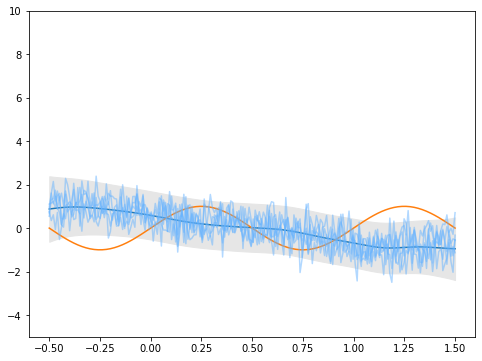

In [8]:
# Show prediction
x_test = x_test.flatten()
plt.figure(figsize=(8, 6))
plt.fill_between(x_test, (mu - unc).flatten(), (mu + unc).flatten(), color=(0.9,) * 3)
plt.plot(x_test, mu)
plt.plot(x_test, f(x_test))
for y_samp_i in y_samp:
    plt.plot(x_test, y_samp_i, color=(0.4, 0.7, 1.0), alpha=0.5)
# plt.plot(x, y, 'o')
plt.ylim(-5, 10)
plt.show()